# TTTC3213 Group Project 
# Group 9
# Title : Extraction, Transformation and Loading for New Arrival Books on MPH Online Bookstore 

**Group 9 Members**

|   | Name                               | Matric Number |
|---|------------------------------------|---------------|
| 1 | Arvind Naido A/L Thirumoorthy      | A181506       |
| 2 | Siti Nurizzati Binti Azman         | A180777       |
| 3 | Nur Farazila Binti Ravazah         | A179811       |
| 4 | Amanina Maisara Binti Shamsulzaman | A182012       | 

# **1. Data Scraping using Selenium and Beautiful Soup**

**Install and import the requisite libraries**

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
url= "https://mphonline.com/"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from time import sleep
response

<Response [200]>

In [ ]:
#Initialize settings for headless browser for chrome.

# create object for chrome options
chrome_options = Options()
base_url = 'https://mphonline.com/'
path = ['https://mphonline.com/collections/top-rated', 'https://mphonline.com/collections/top-rated?page=2']

# set chrome driver options to disable any popup's from the website
# to find local path for chrome profile, open chrome browser
# and in the address bar type, "chrome://version"
chrome_options.add_argument('--headless')
chrome_options.add_argument('disable-notifications')
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# To disable the message, "Chrome is being controlled by automated test software"
chrome_options.add_argument("disable-infobars")

# Pass the argument 1 to allow and 2 to block
chrome_options.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 2
    })

# invoke the webdriver
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

C:\Users\farazila\AppData\Local\Temp\ipykernel_19872\3232543647.py:26: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


**Next, scrap the link of each product from page https://mphonline.com/collections/top-rated Here we are going to scrape all product link that display on the page.**

In [ ]:
data = response.text
soup = BeautifulSoup(data, 'html.parser')

In [ ]:
results = soup.find_all('div', class_='product-item__info-inner')
rep_no = 0
recipes_list = {}
item_link=[]

for result in results:
  
  link = result.find("a").get('href')
  item_link.append(base_url+link)


**Total link of products scraped. (Successfully scraped 123 url for 123 books)**

In [ ]:
len(item_link)

123

**Scrap 123 book details using the url list.**

In [ ]:
all_product= []
page_count=1

for link in item_link:

  browser.get(link)
  delay = 5 #secods

  while True:
      try:
          WebDriverWait(browser, delay)
          sleep(5)
          html = browser.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
          #print(html)
          soup = BeautifulSoup(html, "html.parser")

          # list to temporary store product details
          product_details = []
          
          #details 1: Title
          title = soup.find('h1', class_="product-meta__title heading h1")
          product_details.append(title.text)

          #details 2: Price
          price = soup.find('div', class_="price-list")
          product_details.append(price.text)

          #details 3: Author
          author = soup.find('a', class_="product-meta__vendor link--accented")
          product_details.append(author.text)

          #details 4: Product Details
          details = soup.find('div', class_="card__section card__product-details")
          product_details.append(details.text)

          #details 5: Product Description
          description = soup.find('div', class_="rte text--pull")
          product_details.append(description.text)

          #details 6: Number of Reviews
          no_reviews = soup.find('div', class_="jdgm-widget jdgm-preview-badge jdgm-preview-badge--with-link jdgm--done-setup")
          product_details.append(no_reviews.text)

          #details 7: Stock High
          highstock = soup.find('span', class_="product-form__inventory inventory inventory--high")
          product_details.append(highstock)

          #details 8: Stock Low
          lowstock = soup.find('span', class_="product-form__inventory inventory inventory--low")
          product_details.append(lowstock)

          #store product details in all_product list
          all_product.append(product_details)
          print('Page {} is done'.format(page_count)) #debug
          page_count += 1

          break # it will break from the loop once the specific element will be present. 
      except TimeoutException:
          print ("Loading took too much time!-Try again")

Page 1 is done
Page 2 is done
Page 3 is done
Page 4 is done
Page 5 is done
Page 6 is done
Page 7 is done
Page 8 is done
Page 9 is done
Page 10 is done
Page 11 is done
Page 12 is done
Page 13 is done
Page 14 is done
Page 15 is done
Page 16 is done
Page 17 is done
Page 18 is done
Page 19 is done
Page 20 is done
Page 21 is done
Page 22 is done
Page 23 is done
Page 24 is done
Page 25 is done
Page 26 is done
Page 27 is done
Page 28 is done
Page 29 is done
Page 30 is done
Page 31 is done
Page 32 is done
Page 33 is done
Page 34 is done
Page 35 is done
Page 36 is done
Page 37 is done
Page 38 is done
Page 39 is done
Page 40 is done
Page 41 is done
Page 42 is done
Page 43 is done
Page 44 is done
Page 45 is done
Page 46 is done
Page 47 is done
Page 48 is done
Page 49 is done
Page 50 is done
Page 51 is done
Page 52 is done
Page 53 is done
Page 54 is done
Page 55 is done
Page 56 is done
Page 57 is done
Page 58 is done
Page 59 is done
Page 60 is done
Page 61 is done
Page 62 is done
Page 63 is done
P

In [ ]:
# close the automated browser
browser.close()

# **2. Save scraped data into dataframe**

In [ ]:
import pandas as pd

data = pd.DataFrame(data=all_product,
                    columns=['Title',
                             'Price(MYR)',
                             'Author',
                             'Book Details',
                             'Book Description',
                             'Number of Reviews',
                             'Stock High',
                             'Stock Low'])
data.head()

,Title,Price(MYR),Author,Book Details,Book Description,Number of Reviews,Stock High,Stock Low
0,Spare (UK),\nSale price\nRM165.00,"Prince Harry, The Duke of Sussex",\nProduct Details\n\nPublisher: Transworld\nIS...,\nIt was one of the most searing images of the...,\n No reviews \n,"[In stock (12 units), delivery 1-3 working days]",None
1,The First Decade: My Journey from Blogger to E...,\nSale price\nRM59.93\n\nRegular price\nRM79.90,Vivy Yusof,\nProduct Details\n\nPublisher: Penguin Random...,"\nAt the age of thirty-four, I’ve built a nine...",\n (10) \n,None,"[Only 8 units left, delivery 1-3 working days]"
2,Diary of a Wimpy Kid #2: Rodrick Rules (Disney...,\nSale price\nRM46.50,"Kinney, Jeff",\nProduct Details\n\nPublisher: Penguin Random...,"\nThe second book in the global bestselling, l...",\n No reviews \n,"[In stock (85 units), delivery 1-3 working days]",None
3,Your Fate in 2023 – The Year of The Rabbit (Pe...,\nSale price\nRM115.70,Peter Soo,\nProduct Details\n\nPublisher: K. L. Commerci...,\n* Available at MPH Mid Valley & MPH Online o...,\n (1) \n,None,None
4,Marriage for One,\nSale price\nRM59.90,Ella Maise,\nProduct Details\n\nPublisher: Simon & Schust...,\nThe only way to secure her dream is to marry...,\n No reviews \n,None,"[Only 3 units left, delivery 1-3 working days]"


In [ ]:
# Setting max limit for string to view all data
pd.options.display.max_colwidth = 1000
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
print(data)

                                                                                                      Title                                       Price(MYR)                            Author                                                                                                                                                               Book Details  \
0                                                                                                Spare (UK)                           \nSale price\nRM165.00  Prince Harry, The Duke of Sussex                                                                      \nProduct Details\n\nPublisher: Transworld\nISBN: 9780857504791\nFormat: Hardcover\nWeight: 640 g\n\n   
1                                                 The First Decade: My Journey from Blogger to Entrepreneur  \nSale price\nRM59.93\n\nRegular price\nRM79.90                        Vivy Yusof                                                        \nProduct Details\n\nPub

# **3.Exporting to CSV before Data Cleaning**

In [ ]:
data.to_csv('Group 9-before.csv', encoding='utf-8')

# **4. Data Cleaning For Column Price** - Amanina



In [ ]:
data['Price(MYR)']

0                               \nSale price\nRM165.00
1      \nSale price\nRM59.93\n\nRegular price\nRM79.90
2                                \nSale price\nRM46.50
3                               \nSale price\nRM115.70
4                                \nSale price\nRM59.90
5                                \nSale price\nRM99.90
6                                \nSale price\nRM25.00
7                                \nSale price\nRM30.00
8                                \nSale price\nRM98.00
9                                \nSale price\nRM30.00
10                               \nSale price\nRM30.00
11                               \nSale price\nRM29.00
12                               \nSale price\nRM28.00
13                               \nSale price\nRM28.00
14                               \nSale price\nRM28.00
15                               \nSale price\nRM30.00
16                               \nSale price\nRM53.90
17                              \nSale price\nRM117.50
18        

In [ ]:
data['Price(MYR)'] = data['Price(MYR)'].str.replace("\n"," ")
data['Price(MYR)']

0                             Sale price RM165.00
1       Sale price RM59.93  Regular price RM79.90
2                              Sale price RM46.50
3                             Sale price RM115.70
4                              Sale price RM59.90
5                              Sale price RM99.90
6                              Sale price RM25.00
7                              Sale price RM30.00
8                              Sale price RM98.00
9                              Sale price RM30.00
10                             Sale price RM30.00
11                             Sale price RM29.00
12                             Sale price RM28.00
13                             Sale price RM28.00
14                             Sale price RM28.00
15                             Sale price RM30.00
16                             Sale price RM53.90
17                            Sale price RM117.50
18                             Sale price RM49.90
19                            Sale price RM100.00


**Extracting Data Price, Splitting Data**

In [ ]:
# new data frame with split value columns
new = data['Price(MYR)'].str.split("Regular", n = 1, expand = True)
 
# making separate first name column from new data frame
data["Sale Price"]= new[0]
 
# making separate last name column from new data frame
data["Regular Price"]= "Regular" + new[1]

data.drop(columns =['Price(MYR)'], inplace = True)

In [ ]:
data["Sale Price"]

0        Sale price RM165.00
1       Sale price RM59.93  
2         Sale price RM46.50
3        Sale price RM115.70
4         Sale price RM59.90
5         Sale price RM99.90
6         Sale price RM25.00
7         Sale price RM30.00
8         Sale price RM98.00
9         Sale price RM30.00
10        Sale price RM30.00
11        Sale price RM29.00
12        Sale price RM28.00
13        Sale price RM28.00
14        Sale price RM28.00
15        Sale price RM30.00
16        Sale price RM53.90
17       Sale price RM117.50
18        Sale price RM49.90
19       Sale price RM100.00
20       Sale price RM104.95
21        Sale price RM79.90
22        Sale price RM59.90
23        Sale price RM55.00
24        Sale price RM50.00
25        Sale price RM40.00
26      Sale price RM10.00  
27        Sale price RM54.00
28        Sale price RM55.00
29        Sale price RM54.95
30        Sale price RM30.00
31        Sale price RM59.90
32       Sale price RM115.00
33        Sale price RM30.00
34        Sale

In [ ]:
data["Sale Price"] = data["Sale Price"].str.replace("Sale price RM","")
data["Sale Price"].str.strip()
data["Sale Price"].str.strip()

0      165.00
1       59.93
2       46.50
3      115.70
4       59.90
5       99.90
6       25.00
7       30.00
8       98.00
9       30.00
10      30.00
11      29.00
12      28.00
13      28.00
14      28.00
15      30.00
16      53.90
17     117.50
18      49.90
19     100.00
20     104.95
21      79.90
22      59.90
23      55.00
24      50.00
25      40.00
26      10.00
27      54.00
28      55.00
29      54.95
30      30.00
31      59.90
32     115.00
33      30.00
34      35.00
35      30.00
36      59.90
37      52.90
38      39.68
39      46.90
40      52.90
41      67.43
42      39.68
43      44.93
44      37.50
45      49.90
46      42.90
47      67.43
48      52.90
49      42.50
50      57.95
51      51.95
52      89.90
53      39.90
54     100.00
55      59.93
56      82.50
57     104.95
58      50.00
59      54.00
60      62.90
61      72.90
62      55.00
63      99.90
64      49.90
65      62.90
66     115.00
67      30.00
68      52.43
69      79.90
70      39.90
71    

In [ ]:
data["Regular Price"] = data["Regular Price"].str.replace("Regular price RM","")
data["Regular Price"].str.strip()
data["Regular Price"].str.strip()

0        NaN
1      79.90
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26     10.01
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38     52.90
39       NaN
40       NaN
41     89.90
42     52.90
43     59.90
44     50.00
45       NaN
46       NaN
47     89.90
48       NaN
49       NaN
50       NaN
51       NaN
52       NaN
53       NaN
54       NaN
55     79.90
56       NaN
57       NaN
58       NaN
59       NaN
60       NaN
61       NaN
62       NaN
63       NaN
64       NaN
65       NaN
66       NaN
67       NaN
68     69.90
69       NaN
70       NaN
71       NaN
72       NaN
73       NaN
74       NaN
75     59.95
76       NaN

In [ ]:
#Check null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              123 non-null    object
 1   Author             123 non-null    object
 2   Book Details       123 non-null    object
 3   Book Description   123 non-null    object
 4   Number of Reviews  123 non-null    object
 5   Stock High         66 non-null     object
 6   Stock Low          55 non-null     object
 7   Sale Price         123 non-null    object
 8   Regular Price      13 non-null     object
dtypes: object(9)
memory usage: 8.8+ KB
None


In [ ]:
data["Regular Price"].fillna(data["Sale Price"], inplace=True)

In [ ]:
#Convert to type float
data['Regular Price']=data['Regular Price'].astype('float')
data['Sale Price']=data['Sale Price'].astype('float')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              123 non-null    object 
 1   Author             123 non-null    object 
 2   Book Details       123 non-null    object 
 3   Book Description   123 non-null    object 
 4   Number of Reviews  123 non-null    object 
 5   Stock High         66 non-null     object 
 6   Stock Low          55 non-null     object 
 7   Sale Price         123 non-null    float64
 8   Regular Price      123 non-null    float64
dtypes: float64(2), object(7)
memory usage: 8.8+ KB
None


In [ ]:
#New Column Save
data['Save']=  data["Regular Price"]- data["Sale Price"]

**Replace null values**

In [ ]:
import numpy as np
#replace all zeros with NaN values
data.replace(0, np.nan, inplace=True)

In [ ]:
data["Save"].fillna("No discount", inplace=True)
data

,Title,Author,Book Details,Book Description,Number of Reviews,Stock High,Stock Low,Sale Price,Regular Price,Save
0,Spare (UK),"Prince Harry, The Duke of Sussex",\nProduct Details\n\nPublisher: Transworld\nISBN: 9780857504791\nFormat: Hardcover\nWeight: 640 g\n\n,"\nIt was one of the most searing images of the twentieth century: two young boys, two princes, walking behind their mother's coffin as the world watched in sorrow - and horror. As Diana, Princess of Wales, was laid to rest, billions wondered what the princes must be thinking and feeling - and how their lives would play out from that point on.For Harry, this is that story at last.With its raw, unflinching honesty, Spare is a landmark publication full of insight, revelation, self-examination, and hard-won wisdom about the eternal power of love over grief.Prince Harry wishes to support British charities with donations from his proceeds from Spare. The Duke of Sussex has donated $1,500,000 to Sentebale, an organisation he founded with Prince Seeiso in their mothers' legacies, which supports vulnerable children and young people in Lesotho and Botswana affected by HIV/AIDS. Prince Harry will also donate to the non-profit organisation WellChild in the amount of £300,000. WellChild, which ...",\n No reviews \n,"[In stock (12 units), delivery 1-3 working days]",None,165.00,165.00,No discount
1,The First Decade: My Journey from Blogger to Entrepreneur,Vivy Yusof,\nProduct Details\n\nPublisher: Penguin Random House SEA\nISBN: 9789815058802\nFormat: Hardcover\nWeight: 490 g\n\n,"\nAt the age of thirty-four, I’ve built a nine-figure fashion company, garnered 1.8 million followers on Instagram and managed to squeeze in time to get married and give birth to not one, but four children. And it all started from a blog.\nPerfect for young entrepreneurs, this book shares the secrets of my entrepreneurial journey so far – from starting a business with my boyfriend (telling my dad sure was fun), to writing a business plan on a piece of tissue paper, to fundraising, to dealing with competition and to pretending to nod when my tech team talk about cookies.\nI share my proud wins for you to get inspired by, and my juicy failures for you to eat popcorn to.\nAlways a work in progress, my story is unfinished.\nBut for now, allow me to present to you, The First Decade.\nAbout the author: \nVivy Yusof started blogging about random things and a decade later, has a fashion empire. She co-founded the FashionValet Group in 2010 with her boyfriend and has grown the multi-million...",\n (10) \n,None,"[Only 8 units left, delivery 1-3 working days]",59.93,79.90,19.97
2,Diary of a Wimpy Kid #2: Rodrick Rules (Disney+ Tie In),"Kinney, Jeff",\nProduct Details\n\nPublisher: Penguin Random House Children's UK\nISBN: 9780241633250\nFormat: Paperback\nWeight: 100 g\n\n,"\nThe second book in the global bestselling, laugh-out-loud, fully-illustrated Diary of Wimpy Kid series - now available with a special movie tie-in cover to coincide with the original animated movie on Disney+ premiering December 2022!Greg Heffley's got a secret, and if anyone finds out the juicy details, his life is going to get turned inside out. Unfortunately, he's also got an older brother, Rodrick, who has a talent for sniffing these things out. But secrets can't stay under wraps for long - especially when there's a diary involved.This special edition, with an exclusive cover image, is to celebrate the full-color, 3D animated Disney+ production of Diary of a Wimpy Kid: Rodrick Rules.Rodrick's band, Loeded Diper, has never been so awful, and the laughs have never been so loud. And with 275 million Wimpy Kid books in print and counting, Greg Heffley's world has never been bigger.\n",\n No reviews \n,"[In stock (85 units), delivery 1-3 working days]",None,46.50,46.50,No discount
3,Your Fate in 2023 – The Year of The Rabbit (Peter Soo 2023 English Version),Peter Soo,\nProduct Details\n\nPublisher: K. L. Commercial CO (M)\nISBN: 9789621474469\nF

# **5. Data Cleaning Description and Number of Reviews** - Farazila

**Remove paragraph for description and number of reviews**
**Replace no reviews data with 0 in number of reviews**

In [ ]:
data["Book Description"] = data["Book Description"].str.replace("\n"," ")
data["Number of Reviews"] = data["Number of Reviews"].str.replace("\n"," ")
data["Number of Reviews"] = data["Number of Reviews"].str.replace(")","")
data["Number of Reviews"] = data["Number of Reviews"].str.replace("("," ")
data["Number of Reviews"] = data["Number of Reviews"].str.replace("No reviews","0")
data

C:\Users\farazila\AppData\Local\Temp\ipykernel_19872\2522648767.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Number of Reviews"] = data["Number of Reviews"].str.replace(")","")
C:\Users\farazila\AppData\Local\Temp\ipykernel_19872\2522648767.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Number of Reviews"] = data["Number of Reviews"].str.replace("("," ")


,Title,Author,Book Details,Book Description,Number of Reviews,Stock High,Stock Low,Sale Price,Regular Price,Save
0,Spare (UK),"Prince Harry, The Duke of Sussex",\nProduct Details\n\nPublisher: Transworld\nISBN: 9780857504791\nFormat: Hardcover\nWeight: 640 g\n\n,"It was one of the most searing images of the twentieth century: two young boys, two princes, walking behind their mother's coffin as the world watched in sorrow - and horror. As Diana, Princess of Wales, was laid to rest, billions wondered what the princes must be thinking and feeling - and how their lives would play out from that point on.For Harry, this is that story at last.With its raw, unflinching honesty, Spare is a landmark publication full of insight, revelation, self-examination, and hard-won wisdom about the eternal power of love over grief.Prince Harry wishes to support British charities with donations from his proceeds from Spare. The Duke of Sussex has donated $1,500,000 to Sentebale, an organisation he founded with Prince Seeiso in their mothers' legacies, which supports vulnerable children and young people in Lesotho and Botswana affected by HIV/AIDS. Prince Harry will also donate to the non-profit organisation WellChild in the amount of £300,000. WellChild, which h...",0,"[In stock (12 units), delivery 1-3 working days]",None,165.00,165.00,No discount
1,The First Decade: My Journey from Blogger to Entrepreneur,Vivy Yusof,\nProduct Details\n\nPublisher: Penguin Random House SEA\nISBN: 9789815058802\nFormat: Hardcover\nWeight: 490 g\n\n,"At the age of thirty-four, I’ve built a nine-figure fashion company, garnered 1.8 million followers on Instagram and managed to squeeze in time to get married and give birth to not one, but four children. And it all started from a blog. Perfect for young entrepreneurs, this book shares the secrets of my entrepreneurial journey so far – from starting a business with my boyfriend (telling my dad sure was fun), to writing a business plan on a piece of tissue paper, to fundraising, to dealing with competition and to pretending to nod when my tech team talk about cookies. I share my proud wins for you to get inspired by, and my juicy failures for you to eat popcorn to. Always a work in progress, my story is unfinished. But for now, allow me to present to you, The First Decade. About the author: Vivy Yusof started blogging about random things and a decade later, has a fashion empire. She co-founded the FashionValet Group in 2010 with her boyfriend and has grown the multi-million dollar...",10,None,"[Only 8 units left, delivery 1-3 working days]",59.93,79.90,19.97
2,Diary of a Wimpy Kid #2: Rodrick Rules (Disney+ Tie In),"Kinney, Jeff",\nProduct Details\n\nPublisher: Penguin Random House Children's UK\nISBN: 9780241633250\nFormat: Paperback\nWeight: 100 g\n\n,"The second book in the global bestselling, laugh-out-loud, fully-illustrated Diary of Wimpy Kid series - now available with a special movie tie-in cover to coincide with the original animated movie on Disney+ premiering December 2022!Greg Heffley's got a secret, and if anyone finds out the juicy details, his life is going to get turned inside out. Unfortunately, he's also got an older brother, Rodrick, who has a talent for sniffing these things out. But secrets can't stay under wraps for long - especially when there's a diary involved.This special edition, with an exclusive cover image, is to celebrate the full-color, 3D animated Disney+ production of Diary of a Wimpy Kid: Rodrick Rules.Rodrick's band, Loeded Diper, has never been so awful, and the laughs have never been so loud. And with 275 million Wimpy Kid books in print and counting, Greg Heffley's world has never been bigger.",0,"[In stock (85 units), delivery 1-3 working days]",None,46.50,46.50,No discount
3,Your Fate in 2023 – The Year of The Rabbit (Peter Soo 2023 English Version),Peter Soo,\nProduct Details\n\nPublisher: K. L. Commercial CO (M)\nISBN: 9789621474469\nFormat: Paperback\nWeight: 420 g\n\n,"* Availa

In [ ]:
#Convert data type number of review from object to integer
data['Number of Reviews']=data['Number of Reviews'].astype('int')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              123 non-null    object 
 1   Author             123 non-null    object 
 2   Book Details       123 non-null    object 
 3   Book Description   123 non-null    object 
 4   Number of Reviews  123 non-null    int32  
 5   Stock High         66 non-null     object 
 6   Stock Low          55 non-null     object 
 7   Sale Price         123 non-null    float64
 8   Regular Price      123 non-null    float64
 9   Save               123 non-null    object 
dtypes: float64(2), int32(1), object(7)
memory usage: 9.3+ KB
None


# **6. Data Cleaning for Book Details** - Arvind

In [ ]:
print(data['Book Details'])

0                                                                          \nProduct Details\n\nPublisher: Transworld\nISBN: 9780857504791\nFormat: Hardcover\nWeight: 640 g\n\n
1                                                            \nProduct Details\n\nPublisher: Penguin Random House SEA\nISBN: 9789815058802\nFormat: Hardcover\nWeight: 490 g\n\n
2                                                  \nProduct Details\n\nPublisher: Penguin Random House Children's UK\nISBN: 9780241633250\nFormat: Paperback\nWeight: 100 g\n\n
3                                                             \nProduct Details\n\nPublisher: K. L. Commercial CO (M)\nISBN: 9789621474469\nFormat: Paperback\nWeight: 420 g\n\n
4                                                                \nProduct Details\n\nPublisher: Simon & Schuster Ltd\nISBN: 9781398521629\nFormat: Paperback\nWeight: 420 g\n\n
5                                                                       \nProduct Details\n\nPublisher: Pan Macmill

In [ ]:
data['Book Details'] = data['Book Details'].str.replace("Product Details","")
data['Book Details'] = data['Book Details'].str.replace("\n"," ")

In [ ]:
print(data['Book Details'])

0                                                                           Publisher: Transworld ISBN: 9780857504791 Format: Hardcover Weight: 640 g  
1                                                             Publisher: Penguin Random House SEA ISBN: 9789815058802 Format: Hardcover Weight: 490 g  
2                                                   Publisher: Penguin Random House Children's UK ISBN: 9780241633250 Format: Paperback Weight: 100 g  
3                                                              Publisher: K. L. Commercial CO (M) ISBN: 9789621474469 Format: Paperback Weight: 420 g  
4                                                                 Publisher: Simon & Schuster Ltd ISBN: 9781398521629 Format: Paperback Weight: 420 g  
5                                                                        Publisher: Pan Macmillan ISBN: 9781035001989 Format: Paperback Weight: 420 g  
6                                                                          Publisher: Ga

In [ ]:
data["Book Details"] = data["Book Details"].str.replace("Publication Date: 12-Dec-2021 ","")
data["Book Details"] = data["Book Details"].str.replace("Publication Date: 2016-09-27 ","")
data["Book Details"] = data["Book Details"].str.replace("Publication Date: 20-Feb-2020 ","")
data["Book Details"] = data["Book Details"].str.replace("Dimension: 25 x 17 x 3 cm ","")
data["Book Details"] = data["Book Details"].str.replace("Dimension: 25 x 17 x 3 cm ","")
data["Book Details"] = data["Book Details"].str.replace("Dimension: 21 x 14 x 2 cm ","")

In [ ]:
print(data['Book Details'])

0                                        Publisher: Transworld ISBN: 9780857504791 Format: Hardcover Weight: 640 g  
1                          Publisher: Penguin Random House SEA ISBN: 9789815058802 Format: Hardcover Weight: 490 g  
2                Publisher: Penguin Random House Children's UK ISBN: 9780241633250 Format: Paperback Weight: 100 g  
3                           Publisher: K. L. Commercial CO (M) ISBN: 9789621474469 Format: Paperback Weight: 420 g  
4                              Publisher: Simon & Schuster Ltd ISBN: 9781398521629 Format: Paperback Weight: 420 g  
5                                     Publisher: Pan Macmillan ISBN: 9781035001989 Format: Paperback Weight: 420 g  
6                                       Publisher: Galeri Ilmu ISBN: 9789830979717 Format: Paperback Weight: 420 g  
7                                       Publisher: Galeri Ilmu ISBN: 9789830979724 Format: Paperback Weight: 420 g  
8                                       Publisher: Galeri Ilmu I

In [ ]:
data.rename(columns = {'Book Details':'Book_Details'}, inplace = True)

In [ ]:
data['publisher'] = data.Book_Details.str.extract(r'(.+?(?=ISBN:))', expand=False)
data['isbn'] = data.Book_Details.str.extract(r'(?<=ISBN: )(.*)(?= Format)', expand=False)
data['format'] = data.Book_Details.str.extract(r'(?<=Format: )(.*)(?= Weight:)', expand=False)
data['weight'] = data.Book_Details.str.extract(r'(?<=Weight: )(.*)', expand=False)

In [ ]:
#Remove Publisher : label from data
data["publisher"] = data["publisher"].str.replace(" Publisher: ","")
print(data['publisher'])

0                                Transworld 
1                  Penguin Random House SEA 
2        Penguin Random House Children's UK 
3                   K. L. Commercial CO (M) 
4                      Simon & Schuster Ltd 
5                             Pan Macmillan 
6                               Galeri Ilmu 
7                               Galeri Ilmu 
8                               Galeri Ilmu 
9                                 Karyaseni 
10                              Galeri Ilmu 
11                             Fajar Pakeer 
12                             Fajar Pakeer 
13                             Fajar Pakeer 
14                             Fajar Pakeer 
15                                Karyaseni 
16                         Feiwel & Friends 
17                     North Atlantic Books 
18                            Scholastic US 
19                     MPH Group Publishing 
20                              Penguin SEA 
21                        Random House (UK) 
22        

In [ ]:
print(data['isbn'])

0                                    9780857504791
1                                    9789815058802
2                                    9780241633250
3                                    9789621474469
4                                    9781398521629
5                                    9781035001989
6                                    9789830979717
7                                    9789830979724
8                                    9789830979625
9                                    9789674691981
10                                   9789830979700
11                                   9789838221788
12                                   9789838221771
13                                   9789838221764
14                                   9789838221757
15                                   9789674691943
16                                   9781250618917
17                                   9781623177737
18                                   9781338680454
19                             

In [ ]:
print(data['format'])

0      Hardcover
1      Hardcover
2      Paperback
3      Paperback
4      Paperback
5      Paperback
6      Paperback
7      Paperback
8      Paperback
9      Paperback
10     Paperback
11     Paperback
12     Paperback
13     Paperback
14     Paperback
15     Paperback
16     Paperback
17        Others
18     Hardcover
19     Hardcover
20     Hardcover
21     Paperback
22     Paperback
23     Paperback
24     Hardcover
25     Paperback
26           NaN
27     Hardcover
28     Hardcover
29     Paperback
30     Paperback
31     Paperback
32     Paperback
33     Paperback
34     Paperback
35     Paperback
36     Paperback
37     Paperback
38     Paperback
39     Paperback
40     Paperback
41     Paperback
42     Paperback
43     Paperback
44     Paperback
45     Paperback
46     Paperback
47     Paperback
48     Paperback
49     Paperback
50     Paperback
51     Paperback
52     Paperback
53     Paperback
54     Hardcover
55     Hardcover
56     Paperback
57     Hardcover
58     Hardcov

In [ ]:
print(data['weight'])

0       640 g  
1       490 g  
2       100 g  
3       420 g  
4       420 g  
5       420 g  
6       420 g  
7       420 g  
8       420 g  
9       420 g  
10      420 g  
11      420 g  
12      420 g  
13      420 g  
14      420 g  
15      420 g  
16      680 g  
17      725 g  
18      500 g  
19      690 g  
20      700 g  
21      420 g  
22      420 g  
23      420 g  
24      420 g  
25     1070 g  
26       0 kg  
27      500 g  
28      420 g  
29      180 g  
30      420 g  
31      260 g  
32      735 g  
33      420 g  
34      420 g  
35      420 g  
36      420 g  
37      420 g  
38      420 g  
39      570 g  
40      300 g  
41      268 g  
42      420 g  
43      420 g  
44      420 g  
45      420 g  
46      420 g  
47      268 g  
48      390 g  
49      420 g  
50      420 g  
51      420 g  
52      340 g  
53      420 g  
54      690 g  
55      490 g  
56      300 g  
57      700 g  
58      420 g  
59      500 g  
60      980 g  
61      380 g  
62      

In [ ]:
data.isnull()

,Title,Author,Book_Details,Book Description,Number of Reviews,Stock High,Stock Low,Sale Price,Regular Price,Save,publisher,isbn,format,weight
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
#checking for datatypes
print(data.dtypes)

Title                 object
Author                object
Book_Details          object
Book Description      object
Number of Reviews      int32
Stock High            object
Stock Low             object
Sale Price           float64
Regular Price        float64
Save                  object
publisher             object
isbn                  object
format                object
weight                object
dtype: object


In [ ]:
data["weight"] = data["weight"].str.replace(" g","")
data["weight"] = data["weight"].str.replace(" kg","")
data['weight'] = data['weight'].str.strip()
data["weight"] = data.weight.astype(float)

# **7. Data Cleaning for Stock** - Arvind

In [ ]:
# Change data type to str
data["Stock High"]=data["Stock High"].apply(str)
data["Stock Low"]=data["Stock Low"].apply(str)
print(data.dtypes)

Title                 object
Author                object
Book_Details          object
Book Description      object
Number of Reviews      int32
Stock High            object
Stock Low             object
Sale Price           float64
Regular Price        float64
Save                  object
publisher             object
isbn                  object
format                object
weight               float64
dtype: object


In [ ]:
print(data['Stock High'])

0       <span class="product-form__inventory inventory inventory--high">In stock (12 units), delivery 1-3 working days</span>
1                                                                                                                        None
2       <span class="product-form__inventory inventory inventory--high">In stock (85 units), delivery 1-3 working days</span>
3                                                                                                                        None
4                                                                                                                        None
5                                                                                                                        None
6                                                                                                                        None
7                                                                                                                     

In [ ]:
print(data['Stock Low'])

0                                                                                                                     None
1       <span class="product-form__inventory inventory inventory--low">Only 8 units left, delivery 1-3 working days</span>
2                                                                                                                     None
3                                                                                                                     None
4       <span class="product-form__inventory inventory inventory--low">Only 3 units left, delivery 1-3 working days</span>
5       <span class="product-form__inventory inventory inventory--low">Only 8 units left, delivery 1-3 working days</span>
6       <span class="product-form__inventory inventory inventory--low">Only 4 units left, delivery 1-3 working days</span>
7       <span class="product-form__inventory inventory inventory--low">Only 5 units left, delivery 1-3 working days</span>
8       <span cl

In [ ]:
import re
data['Stock High'] = data['Stock High'].str.replace("<span class=\"product-form__inventory inventory inventory--high\">","")
data['Stock High'] = data['Stock High'].str.replace(", delivery 1-3 working days</span>","")
tag1 = " units)"
tag2 = "In stock ("
tag3 = "None"
tag4 = "In stock</span>"
tag5 = "Pre-Order Item (to be delivered together with other purchases)</span>"
data['Stock High'] = data['Stock High'].str.replace(re.escape(tag1),"")
data['Stock High'] = data['Stock High'].str.replace(re.escape(tag2),"")
data['Stock High'] = data['Stock High'].str.replace(re.escape(tag3),"0")
data['Stock High'] = data['Stock High'].str.replace(re.escape(tag4),"0") #26
data['Stock High'] = data['Stock High'].str.replace(re.escape(tag5),"0") #55

C:\Users\farazila\AppData\Local\Temp\ipykernel_19872\2814629312.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Stock High'] = data['Stock High'].str.replace(re.escape(tag1),"")
C:\Users\farazila\AppData\Local\Temp\ipykernel_19872\2814629312.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Stock High'] = data['Stock High'].str.replace(re.escape(tag2),"")
C:\Users\farazila\AppData\Local\Temp\ipykernel_19872\2814629312.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Stock High'] = data['Stock High'].str.replace(re.escape(tag4),"0") #26
C:\Users\farazila\AppData\Local\Temp\ipykernel_19872\2814629312.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Stock High'] = data['Stock High'].str.replace(re.escape(tag5),"0") #55


In [ ]:
print(data['Stock High'])

0       12
1        0
2       85
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19     140
20       0
21      40
22       0
23      60
24      15
25      15
26       0
27       0
28      11
29       0
30       0
31       0
32      38
33       0
34      39
35      27
36      35
37       0
38      21
39      12
40      37
41       0
42      83
43      18
44       0
45       0
46      15
47     129
48       0
49       0
50      15
51      31
52      18
53       0
54     140
55       0
56      23
57       0
58      15
59       0
60       0
61      23
62      11
63      63
64      11
65      40
66      38
67      27
68      32
69       0
70      13
71       0
72      17
73       0
74       0
75       0
76       0
77       0
78      43
79      49
80       0
81      32
82      73
83      28
84      27
85      33
86      43
87       0
88      35
89       0
90      28

In [ ]:
print(data['Stock Low'])

0                                                                                                                     None
1       <span class="product-form__inventory inventory inventory--low">Only 8 units left, delivery 1-3 working days</span>
2                                                                                                                     None
3                                                                                                                     None
4       <span class="product-form__inventory inventory inventory--low">Only 3 units left, delivery 1-3 working days</span>
5       <span class="product-form__inventory inventory inventory--low">Only 8 units left, delivery 1-3 working days</span>
6       <span class="product-form__inventory inventory inventory--low">Only 4 units left, delivery 1-3 working days</span>
7       <span class="product-form__inventory inventory inventory--low">Only 5 units left, delivery 1-3 working days</span>
8       <span cl

In [ ]:
data['Stock Low'] = data['Stock Low'].str.replace(" units left, delivery 1-3 working days","")
data['Stock Low'] = data['Stock Low'].str.replace(" unit left, delivery 1-3 working days","")
data['Stock Low'] = data['Stock Low'].str.replace("<span class=\"product-form__inventory inventory inventory--low\">Only ","")
data['Stock Low'] = data['Stock Low'].str.replace("</span>","")
data['Stock Low'] = data['Stock Low'].str.replace(" units left, delivery 1-3 working days","")
data['Stock Low'] = data['Stock Low'].str.replace(" unit left, delivery 1-3 working days","")
data['Stock Low'] = data['Stock Low'].str.replace("None","0")

In [ ]:
print(data['Stock Low'])

0       0
1       8
2       0
3       0
4       3
5       8
6       4
7       5
8       5
9       5
10      5
11      4
12      5
13      5
14      5
15      5
16      0
17      1
18      4
19      0
20      8
21      0
22     10
23      0
24      0
25      0
26      0
27      9
28      0
29      4
30      9
31      4
32      0
33      4
34      0
35      0
36      0
37      3
38      0
39      0
40      0
41      8
42      0
43      0
44      8
45      1
46      0
47      0
48      4
49      2
50      0
51      0
52      0
53      7
54      0
55      8
56      0
57      8
58      0
59      9
60      9
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      7
70      0
71      7
72      0
73      4
74      8
75      2
76      2
77      9
78      0
79      0
80      4
81      0
82      0
83      0
84      0
85      0
86      0
87      3
88      0
89      3
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      6
98      7
99      0


In [ ]:
data.rename(columns = {'Stock High':'Stock_High'}, inplace = True)
data["Stock_High"] = data.Stock_High.astype(float)

In [ ]:
data.rename(columns = {'Stock Low':'Stock_Low'}, inplace = True)
data["Stock_Low"] = data.Stock_Low.astype(float)
print(data['Stock_Low'])

0       0.0
1       8.0
2       0.0
3       0.0
4       3.0
5       8.0
6       4.0
7       5.0
8       5.0
9       5.0
10      5.0
11      4.0
12      5.0
13      5.0
14      5.0
15      5.0
16      0.0
17      1.0
18      4.0
19      0.0
20      8.0
21      0.0
22     10.0
23      0.0
24      0.0
25      0.0
26      0.0
27      9.0
28      0.0
29      4.0
30      9.0
31      4.0
32      0.0
33      4.0
34      0.0
35      0.0
36      0.0
37      3.0
38      0.0
39      0.0
40      0.0
41      8.0
42      0.0
43      0.0
44      8.0
45      1.0
46      0.0
47      0.0
48      4.0
49      2.0
50      0.0
51      0.0
52      0.0
53      7.0
54      0.0
55      8.0
56      0.0
57      8.0
58      0.0
59      9.0
60      9.0
61      0.0
62      0.0
63      0.0
64      0.0
65      0.0
66      0.0
67      0.0
68      0.0
69      7.0
70      0.0
71      7.0
72      0.0
73      4.0
74      8.0
75      2.0
76      2.0
77      9.0
78      0.0
79      0.0
80      4.0
81      0.0
82      0.0
83  

In [ ]:
print(data.dtypes)

Title                 object
Author                object
Book_Details          object
Book Description      object
Number of Reviews      int32
Stock_High           float64
Stock_Low            float64
Sale Price           float64
Regular Price        float64
Save                  object
publisher             object
isbn                  object
format                object
weight               float64
dtype: object


In [ ]:
print(data['Stock_Low'])
print(data['Stock_High'])

0       0.0
1       8.0
2       0.0
3       0.0
4       3.0
5       8.0
6       4.0
7       5.0
8       5.0
9       5.0
10      5.0
11      4.0
12      5.0
13      5.0
14      5.0
15      5.0
16      0.0
17      1.0
18      4.0
19      0.0
20      8.0
21      0.0
22     10.0
23      0.0
24      0.0
25      0.0
26      0.0
27      9.0
28      0.0
29      4.0
30      9.0
31      4.0
32      0.0
33      4.0
34      0.0
35      0.0
36      0.0
37      3.0
38      0.0
39      0.0
40      0.0
41      8.0
42      0.0
43      0.0
44      8.0
45      1.0
46      0.0
47      0.0
48      4.0
49      2.0
50      0.0
51      0.0
52      0.0
53      7.0
54      0.0
55      8.0
56      0.0
57      8.0
58      0.0
59      9.0
60      9.0
61      0.0
62      0.0
63      0.0
64      0.0
65      0.0
66      0.0
67      0.0
68      0.0
69      7.0
70      0.0
71      7.0
72      0.0
73      4.0
74      8.0
75      2.0
76      2.0
77      9.0
78      0.0
79      0.0
80      4.0
81      0.0
82      0.0
83  

In [ ]:
data['Stock_High'] = data['Stock_High'].replace(0.0, np.nan)

In [ ]:
data['Stock_Low'] = data['Stock_Low'].replace(0.0, np.nan)

In [ ]:
print(data['Stock_Low'])
print(data['Stock_High'])

0       NaN
1       8.0
2       NaN
3       NaN
4       3.0
5       8.0
6       4.0
7       5.0
8       5.0
9       5.0
10      5.0
11      4.0
12      5.0
13      5.0
14      5.0
15      5.0
16      NaN
17      1.0
18      4.0
19      NaN
20      8.0
21      NaN
22     10.0
23      NaN
24      NaN
25      NaN
26      NaN
27      9.0
28      NaN
29      4.0
30      9.0
31      4.0
32      NaN
33      4.0
34      NaN
35      NaN
36      NaN
37      3.0
38      NaN
39      NaN
40      NaN
41      8.0
42      NaN
43      NaN
44      8.0
45      1.0
46      NaN
47      NaN
48      4.0
49      2.0
50      NaN
51      NaN
52      NaN
53      7.0
54      NaN
55      8.0
56      NaN
57      8.0
58      NaN
59      9.0
60      9.0
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      7.0
70      NaN
71      7.0
72      NaN
73      4.0
74      8.0
75      2.0
76      2.0
77      9.0
78      NaN
79      NaN
80      4.0
81      NaN
82      NaN
83  

In [ ]:
data['new_stock'] = data['Stock_High'].fillna(data['Stock_Low'])

In [ ]:
data['new_stock'] = data['new_stock'].replace(np.nan, 0.0 )

In [ ]:
data['new_stock']
#26,15

0       12.0
1        8.0
2       85.0
3        0.0
4        3.0
5        8.0
6        4.0
7        5.0
8        5.0
9        5.0
10       5.0
11       4.0
12       5.0
13       5.0
14       5.0
15       5.0
16       0.0
17       1.0
18       4.0
19     140.0
20       8.0
21      40.0
22      10.0
23      60.0
24      15.0
25      15.0
26       0.0
27       9.0
28      11.0
29       4.0
30       9.0
31       4.0
32      38.0
33       4.0
34      39.0
35      27.0
36      35.0
37       3.0
38      21.0
39      12.0
40      37.0
41       8.0
42      83.0
43      18.0
44       8.0
45       1.0
46      15.0
47     129.0
48       4.0
49       2.0
50      15.0
51      31.0
52      18.0
53       7.0
54     140.0
55       8.0
56      23.0
57       8.0
58      15.0
59       9.0
60       9.0
61      23.0
62      11.0
63      63.0
64      11.0
65      40.0
66      38.0
67      27.0
68      32.0
69       7.0
70      13.0
71       7.0
72      17.0
73       4.0
74       8.0
75       2.0
76       2.0

# **8. Data Cleaning Title, Author, Description, Publisher, Format** - Izzati



*   Convert Author and Desription to lowercase. 
*   The format of every row in Title is not consistent. We will convert all alphabets to lower case and remove the redundant symbol and spaces to make it neat.



In [ ]:
data['Title'] = data['Title'].str.lower().str.replace(r'[^A-Za-z0-9 ]', '', regex=True).str.strip()
data['Author'] = data['Author'].str.lower()
data['Book Description'] = data['Book Description'].str.lower()
data['publisher'] = data['publisher'].str.lower()
data['format'] = data['format'].str.lower()

**Remove punction for attribute Title and Description.**

In [ ]:
data["Title"] = data['Title'].str.replace('[^\w\s]','')
data["Book Description"] = data['Book Description'].str.replace('[^\w\s]','')
data.head()

C:\Users\farazila\AppData\Local\Temp\ipykernel_19872\1024793511.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Title"] = data['Title'].str.replace('[^\w\s]','')
C:\Users\farazila\AppData\Local\Temp\ipykernel_19872\1024793511.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Book Description"] = data['Book Description'].str.replace('[^\w\s]','')


,Title,Author,Book_Details,Book Description,Number of Reviews,Stock_High,Stock_Low,Sale Price,Regular Price,Save,publisher,isbn,format,weight,new_stock
0,spare uk,"prince harry, the duke of sussex",Publisher: Transworld ISBN: 9780857504791 Format: Hardcover Weight: 640 g,it was one of the most searing images of the twentieth century two young boys two princes walking behind their mothers coffin as the world watched in sorrow and horror as diana princess of wales was laid to rest billions wondered what the princes must be thinking and feeling and how their lives would play out from that point onfor harry this is that story at lastwith its raw unflinching honesty spare is a landmark publication full of insight revelation selfexamination and hardwon wisdom about the eternal power of love over griefprince harry wishes to support british charities with donations from his proceeds from spare the duke of sussex has donated 1500000 to sentebale an organisation he founded with prince seeiso in their mothers legacies which supports vulnerable children and young people in lesotho and botswana affected by hivaids prince harry will also donate to the nonprofit organisation wellchild in the amount of 300000 wellchild which he has been royal patron of for fift...,0,12.0,NaN,165.00,165.0,No discount,transworld,9780857504791,hardcover,640.0,12.0
1,the first decade my journey from blogger to entrepreneur,vivy yusof,Publisher: Penguin Random House SEA ISBN: 9789815058802 Format: Hardcover Weight: 490 g,at the age of thirtyfour ive built a ninefigure fashion company garnered 18 million followers on instagram and managed to squeeze in time to get married and give birth to not one but four children and it all started from a blog perfect for young entrepreneurs this book shares the secrets of my entrepreneurial journey so far from starting a business with my boyfriend telling my dad sure was fun to writing a business plan on a piece of tissue paper to fundraising to dealing with competition and to pretending to nod when my tech team talk about cookies i share my proud wins for you to get inspired by and my juicy failures for you to eat popcorn to always a work in progress my story is unfinished but for now allow me to present to you the first decade about the author vivy yusof started blogging about random things and a decade later has a fashion empire she cofounded the fashionvalet group in 2010 with her boyfriend and has grown the multimillion dollar company into household names...,10,NaN,8.0,59.93,79.9,19.97,penguin random house sea,9789815058802,hardcover,490.0,8.0
2,diary of a wimpy kid 2 rodrick rules disney tie in,"kinney, jeff",Publisher: Penguin Random House Children's UK ISBN: 9780241633250 Format: Paperback Weight: 100 g,the second book in the global bestselling laughoutloud fullyillustrated diary of wimpy kid series now available with a special movie tiein cover to coincide with the original animated movie on disney premiering december 2022greg heffleys got a secret and if anyone finds out the juicy details his life is going to get turned inside out unfortunately hes also got an older brother rodrick who has a talent for sniffing these things out but secrets cant stay under wraps for long especially when theres a diary involvedthis special edition with an exclusive cover image is to celebrate the fullcolor 3d animated disney production of diary of a wimpy kid rodrick rulesrodricks band loeded diper has never been so awful and the laughs have never been so loud and with 275 million wimpy kid books in print and counting greg heffleys world has never been bigger,0,85.0,NaN,46.50,46.5,No discount,penguin random house children's uk,9780241633250,paperback,100.0,85.0
3,your fate in 2023 the year of the rabbit peter soo 2023 english version,peter soo,Publisher: K. L. Commercial CO (M) ISBN: 9789621474469 Format: Paperback Weight: 420 g,available at mph mid valley mph online only this book is the english version for 蘇民峰2023兔年運程 it provides a com

# **9. Data Binning** - Farazila

In [ ]:
print('The hightest number of reviews:', data['Number of Reviews'].max())
print('The Lowest number of reviews:', data['Number of Reviews'].min())

The hightest number of reviews: 44
The Lowest number of reviews: 0


In [ ]:
import numpy as np

#add new column next to price column
data.insert(2, 'number of reviews binned', '')

binwidth_review = (max(data['Number of Reviews'])-min(data['Number of Reviews']))/3
group_names_review = ['Low Review', 'Medium Reviews', 'High Reviews']
bins_review = np.arange(min(data['Number of Reviews']), max(data['Number of Reviews'])+binwidth_review,  binwidth_review)

data['number of reviews binned'] = pd.cut(data['Number of Reviews'], bins=bins_review, labels=group_names_review, include_lowest=True)

In [ ]:
bins_review

array([ 0.        , 14.66666667, 29.33333333, 44.        ])

In [ ]:
print('The hightest number of weight:', data['weight'].max())
print('The Lowest number of weight:', data['weight'].min())

The hightest number of weight: 1350.0
The Lowest number of weight: 0.0


In [ ]:
import numpy as np

#add new column next to price column
data.insert(2, 'weight binned', '')

binwidth = (max(data['weight'])-min(data['weight']))/3
group_names = ['Low', 'Medium', 'High']
bins = np.arange(min(data['weight']), max(data['weight'])+binwidth,  binwidth)

data['weight binned'] = pd.cut(data['weight'], bins=bins, labels=group_names, include_lowest=True)

In [ ]:
bins

array([   0.,  450.,  900., 1350.])

In [ ]:
#import visualisation libaries
%matplotlib inline
import matplotlib.pyplot as plt

# **10. Data Visualisation**

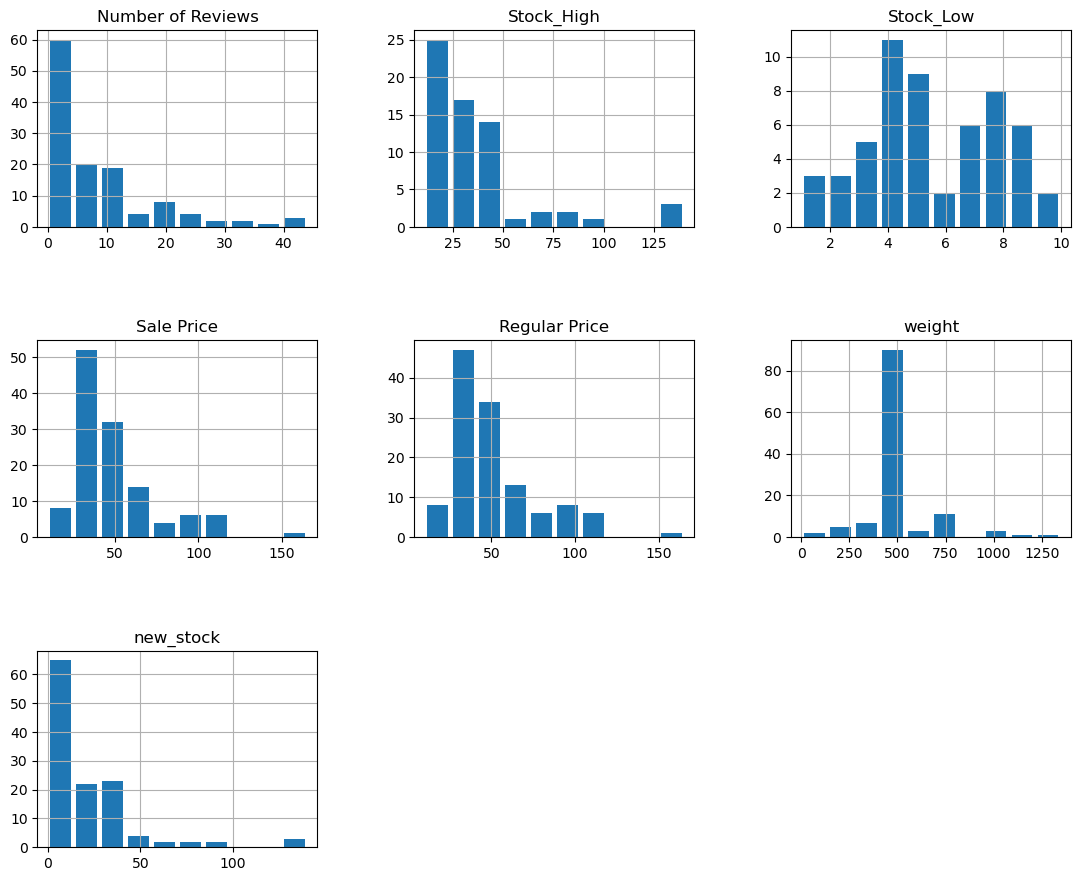

In [ ]:
#create histrogram

plt.rcParams['figure.figsize'] = [12, 10]
data.hist(rwidth=0.8)
plt.tight_layout(pad= 5)
plt.show()

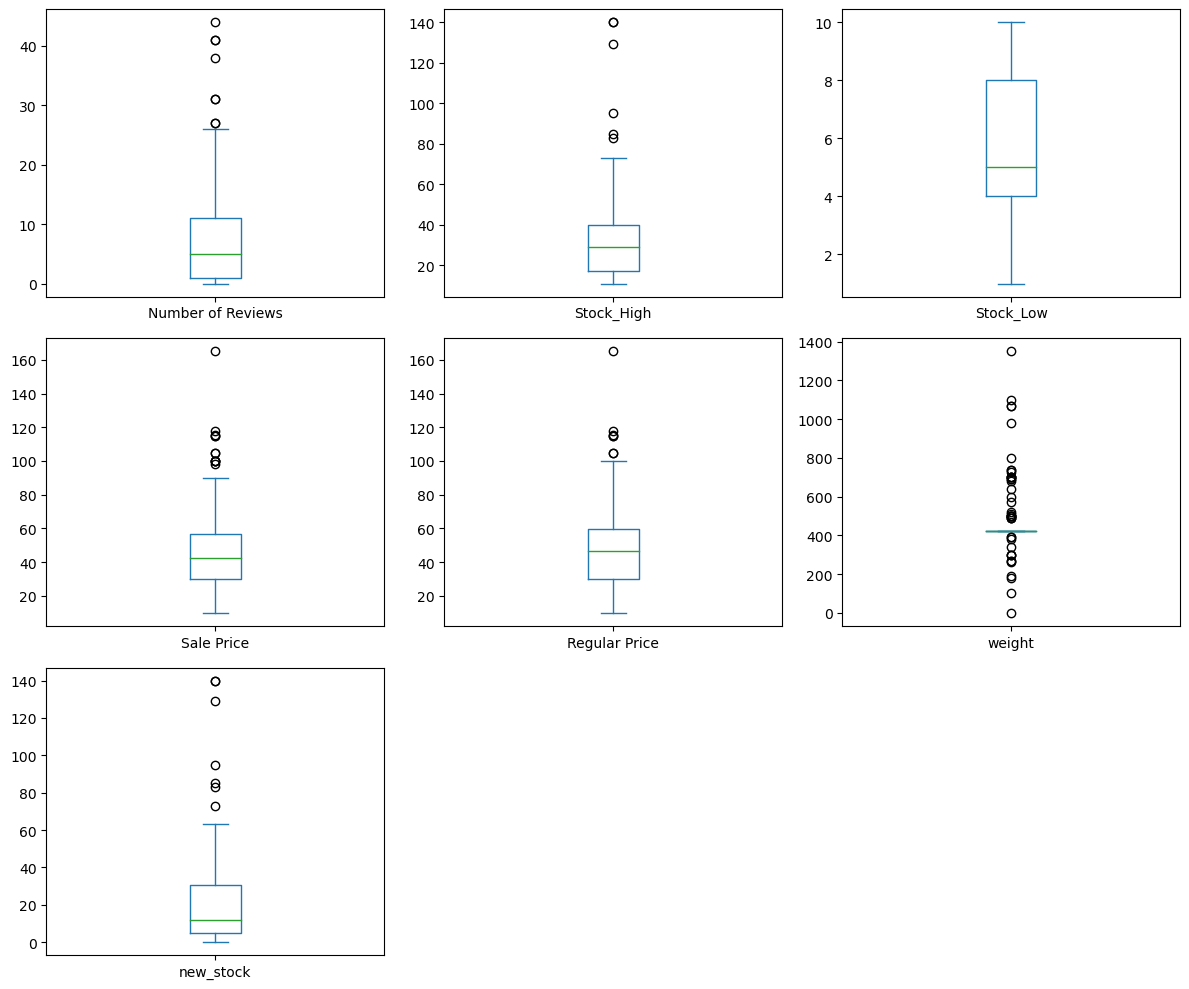

In [ ]:
#create Box Plots
plt.rcParams['figure.figsize'] = [12, 10]
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Save'>

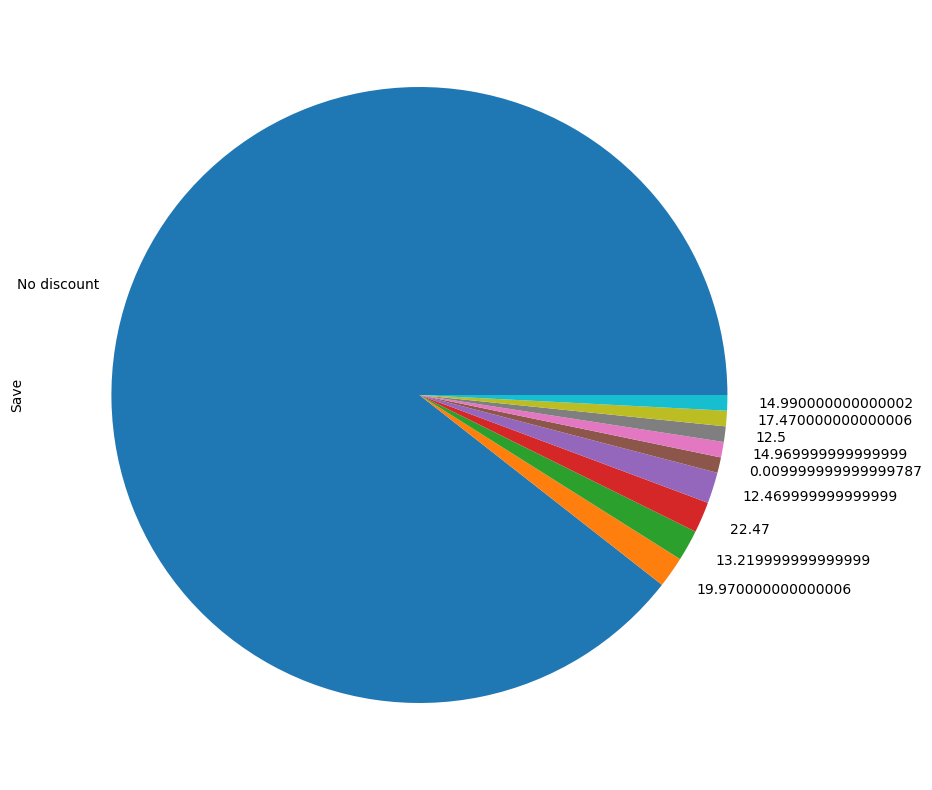

In [ ]:
data['Save'].value_counts().plot(kind='pie')

In [ ]:
data['weight binned'].value_counts()
data['number of reviews binned'].value_counts()

Low Review        100
Medium Reviews     17
High Reviews        6
Name: number of reviews binned, dtype: int64

<AxesSubplot:ylabel='weight binned'>

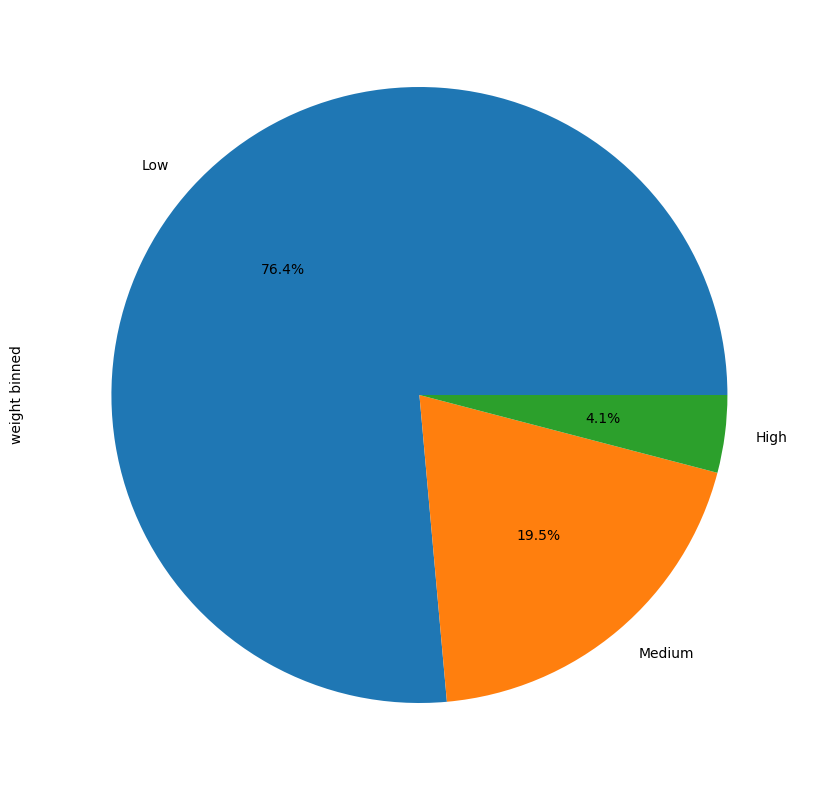

In [ ]:
data['weight binned'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:ylabel='number of reviews binned'>

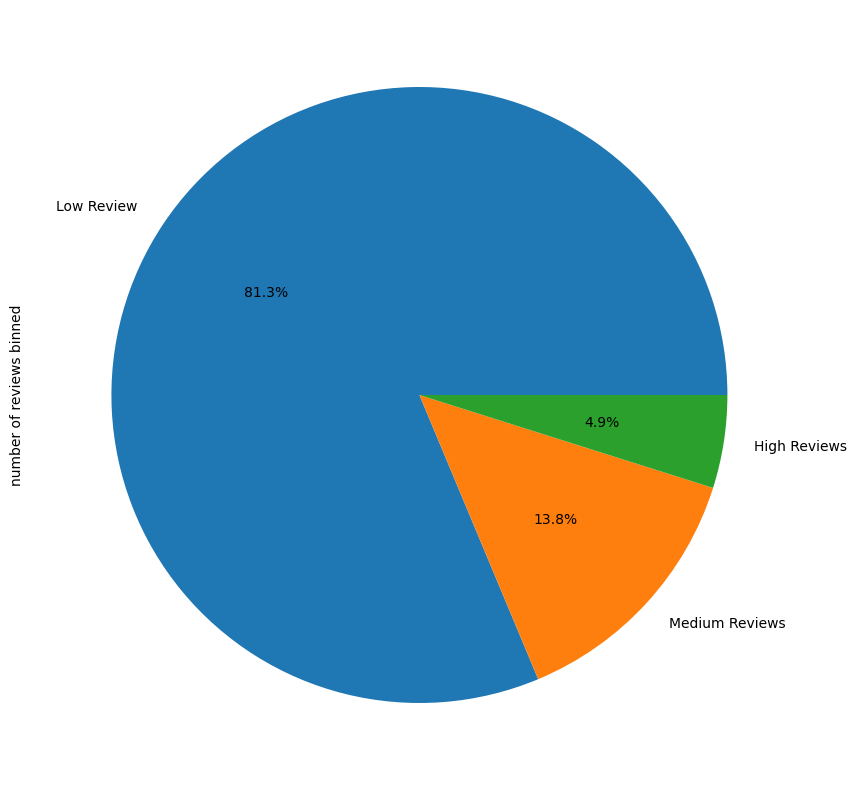

In [ ]:
data['number of reviews binned'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# **11. Export to CSV**

In [ ]:
data.to_csv('Group 9.csv', encoding='utf-8')

In [ ]:
!pip install openpyxl

#Export to csv in google colab
data.to_csv('final.csv', encoding='utf-8')

In [ ]:
data.to_excel("converted-to-excel.xlsx")